## Information Visualization Plots Checklist

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
# To load seaborn dataset
df = sns.load_dataset("tips")
# viewing few lines of data for verification
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# To check the number of rows and no. of columns in the data.
df.shape

(244, 7)

In [4]:
# what are the columns in the data
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
# to check information about data such as total number of columns, each column datatype, number of not null rows , etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [6]:
# To see the statistics of the data such as mean , median, count , etc.
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Univariate plots

### 1. Histograms

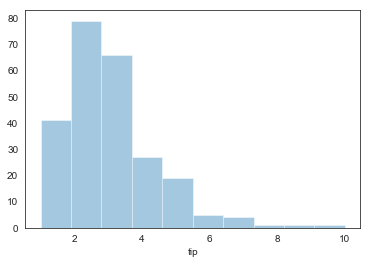

In [7]:
# histograms
# set styles for the grid
sns.set_style("white") # always use white backgroud so that the important data is visible clearly.
sns.distplot(df['tip'], kde=False, bins=10);

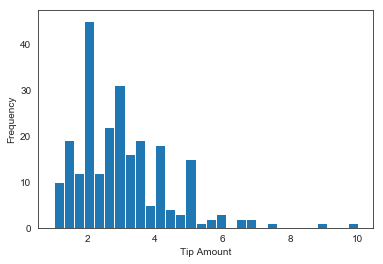

In [8]:
# Histograms

fig, ax = plt.subplots()
# increased number of bins
n, bins, patches = ax.hist(df['tip'], bins=30)
ax.set_xlabel('Tip Amount')
ax.set_ylabel('Frequency')
# to show the plot
plt.show()

### 2. Kernel Density estimate plot

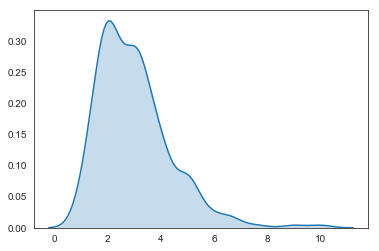

In [9]:
# kernel density estimate plot 

sns.kdeplot(df['tip'], shade=True, legend=False );

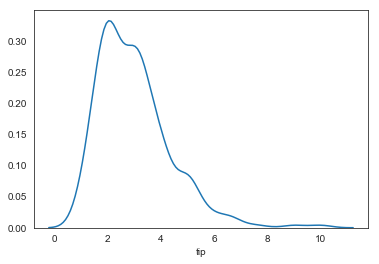

In [10]:
# kernel density plot using distplot in seaborn 
sns.distplot(df['tip'],hist=False);

### 3. Boxplot or whisker plots

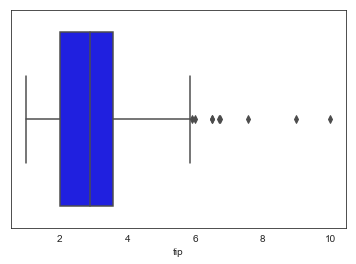

In [11]:
# boxplot - it shows median, max, min , interquartile range , 25 percentile and 75 percentile and outiers
sns.boxplot(df['tip'], color = "blue", orient = "h")

### 4. Violin plot

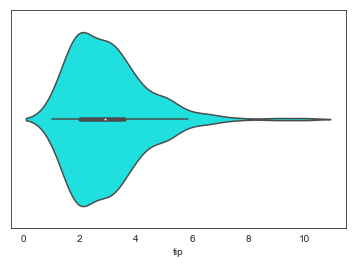

In [12]:
# violin plot is a combination of box pot and kernel density plot
sns.violinplot(df['tip'], color = 'cyan')

### 5. Barplots

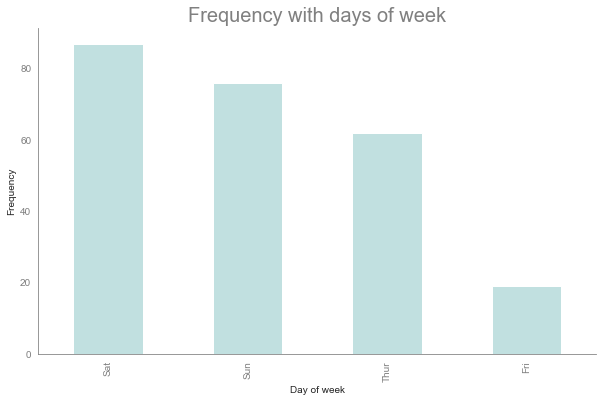

In [13]:
# Barplots can be used for visualizing frequency of categorical data.
fig, ax = plt.subplots(figsize=(10,6))
ax = fig.gca()

df['day'].value_counts().plot.bar(ax=ax, color=(0.2, 0.6, 0.6, 0.3))
ax.set_xlabel('Day of week') # To set x-label
ax.set_ylabel('Frequency') # To set y-label

# The below axis settings are used as per Edward Tufte's design principles.
ax.set_title('Frequency with days of week', size=20, color='gray') # changed the title color to gray
ax.spines['right'].set_visible(False) # remove right border
ax.spines['top'].set_visible(False) # remove top border
ax.tick_params(axis='y', colors='gray') # changed color of x-labels
ax.tick_params(axis='x', colors='gray') # changed color of y-labels
ax.spines['left'].set_color('gray') # changed the y axis color
ax.spines['bottom'].set_color('gray') # changed the x axis color
plt.show()

### 6. Count plot/ Category plot

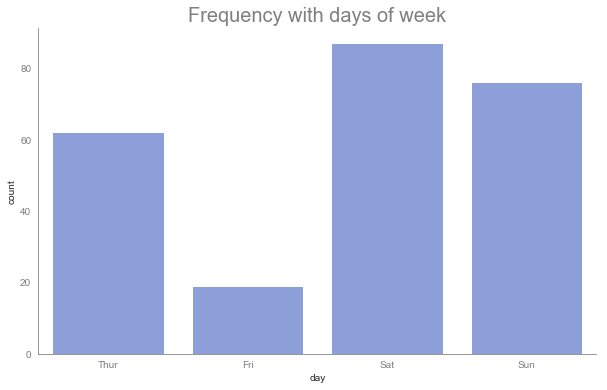

In [14]:
# count plot is mainly used for categorical data representation, it directly takes counts of each category and plots
fig, ax = plt.subplots(figsize=(10,6))
ax = fig.gca()
sns.countplot(data=df, x='day', ax=ax, color=(0.5, 0.6, 0.9, 1))
# The below axis settings are used as per Edward Tufte's design principles.
ax.set_title('Frequency with days of week', size=20, color='gray') # changed the title color to gray
ax.spines['right'].set_visible(False) # remove right border
ax.spines['top'].set_visible(False) # remove top border
ax.tick_params(axis='y', colors='gray') # changed color of x-labels
ax.tick_params(axis='x', colors='gray') # changed color of y-labels
ax.spines['left'].set_color('gray') # changed the y axis color
ax.spines['bottom'].set_color('gray') # changed the x axis color
plt.show()

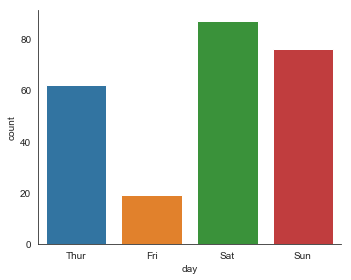

In [15]:
# category plot can also be used to represent counts
sns.catplot(x="day", data=df, kind="count", height=4, aspect=1.2);

## Bivariate plots and Multivariate plots

### 1. seaborn lmplot(scatter plot with regression line)

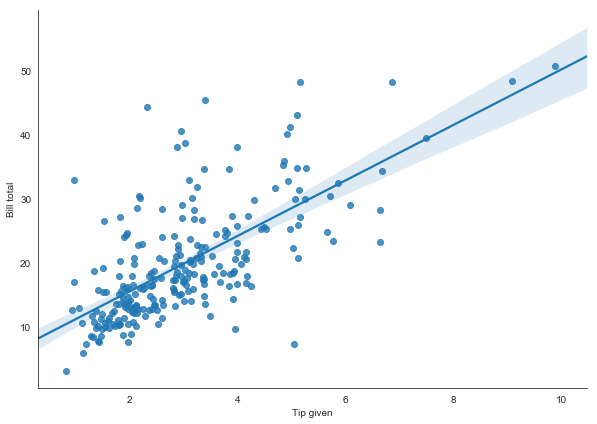

In [16]:
# lmplot

sns.lmplot(x='tip', y='total_bill', data=df, height=6, aspect=1.4, x_jitter=0.2) # aspect is used to increase the width
# By using jitter the noise is added to a copy of the data. Used for plotting variables that take discrete values.
ax=plt.gca() # get current axis
ax.set_xlabel('Tip given') # set x_label
ax.set_ylabel('Bill total') # set y_label
plt.show()

### 2. seaborn lmplot with hue 

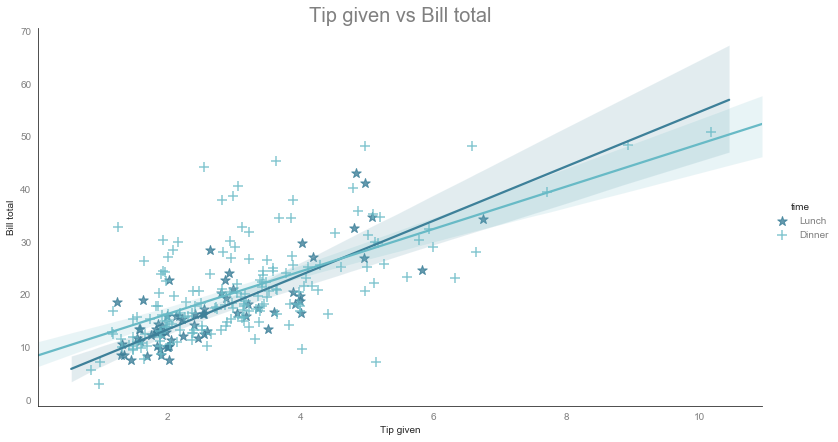

In [17]:
# lmplot using hue, which adds third dimension to the data.
# rcparams are used to set parameter values in matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.lmplot(x='tip', y='total_bill',hue='time', data=df, height=6, x_jitter=0.2, \
           aspect=1.8, markers=['*', '+'], scatter_kws={"s": 100}, palette='GnBu_d') # aspect is used to increase the width


plt.title('Tip given vs Bill total', size=20,color='gray') # changed the title color
plt.xlabel('Tip given')
plt.ylabel('Bill total')
plt.setp(ax._legend.get_texts(), color='gray') # changed the legend label color
for a in ax.axes.ravel(): # ravel Return a flattened array.
    a.set_xticklabels(a.get_xticklabels(), color='gray') # changed the x- axis label color
for a in ax.axes.ravel():
    a.set_yticklabels(a.get_yticklabels(), color='gray') # changed the y-axis label color

### 3. Regplot similar to lmplot

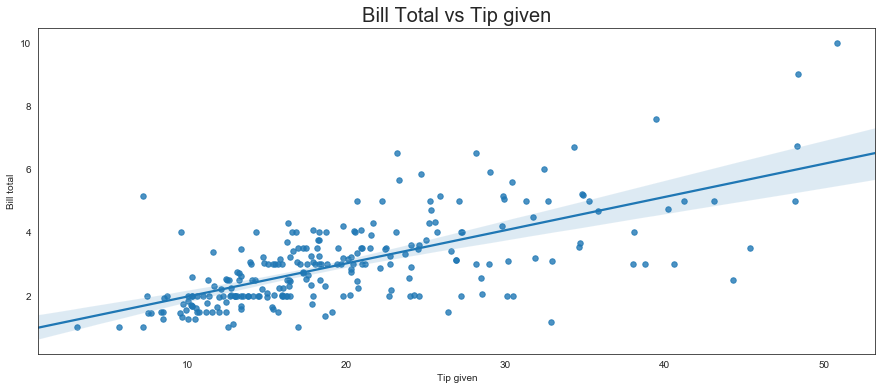

In [18]:
# Regplot
# regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects,
#or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required
#parameter and the x and y variables must be specified as strings.
fig, ax = plt.subplots()
sns.regplot(x="total_bill", y="tip", data=df, scatter_kws={"s": 30});

ax.set_xlabel('Tip given') # set x_label
ax.set_ylabel('Bill total') # set y_label
fig.set_size_inches(15, 6)
ax.set_title('Bill Total vs Tip given', fontsize=20)
plt.show()

### 4. ResidPlot

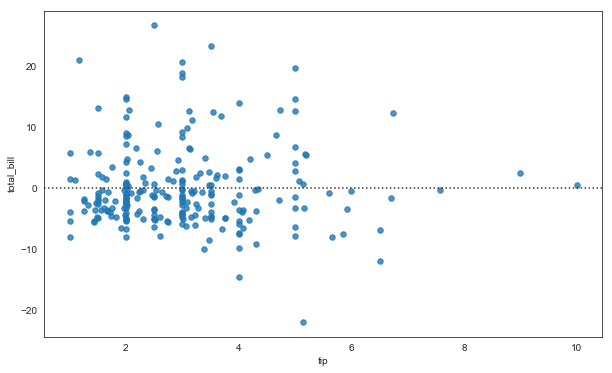

In [19]:
# The residplot() is used for checking whether the simple regression model is appropriate for a dataset.
# It fits and removes a simple linear regression and then plots the residual values for each observation.
# Ideally, these values should be randomly scattered around y = 0:
sns.residplot(x="tip", y="total_bill", data=df,
              scatter_kws={"s": 30});

### 5. Joint plot with reg plot

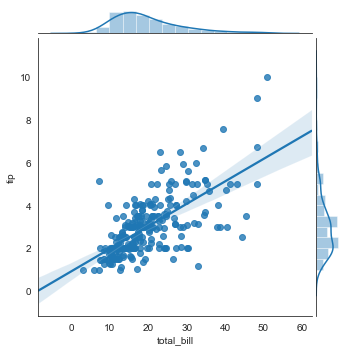

In [20]:
# Joint plot with kind = 'reg'
# jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"
sns.jointplot(x="total_bill", y="tip", data=df, kind="reg", height=5, ratio=10);


### 6. Categorical scatterplots

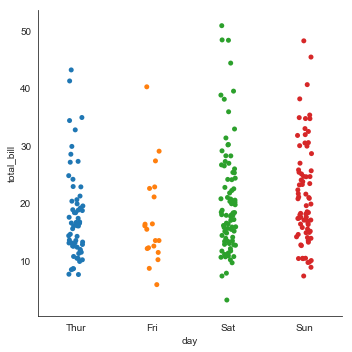

In [21]:
# The default representation of the data in catplot() uses a scatterplot.
sns.catplot(x="day", y="total_bill", data=df);

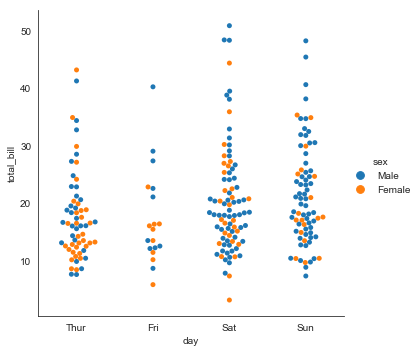

In [22]:
# catplot using kind = swarm
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=df);

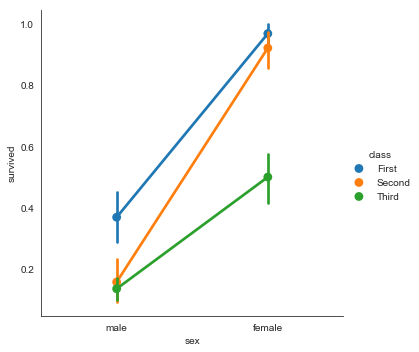

In [23]:
# Point plot/ slope chart
# it plots the point estimate and confidence interval
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

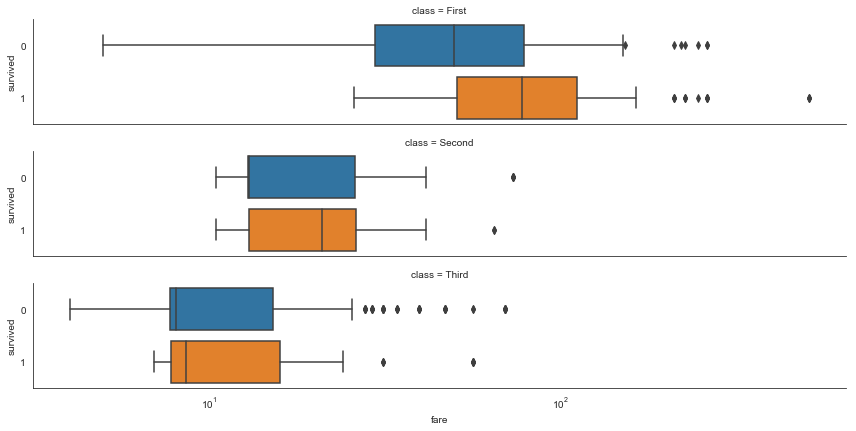

In [24]:
# catplot with kind = box and logarithmic xscale
## https://seaborn.pydata.org/tutorial/categorical.html
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=2, aspect=6,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

### 7. Violin plot for 2 variables

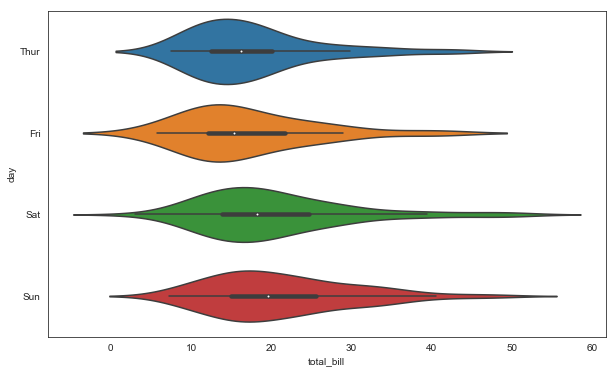

In [25]:
# violin plot
sns.violinplot(x=df.total_bill, y=df.day);

### 8. Lineplot using relplot with kind = line

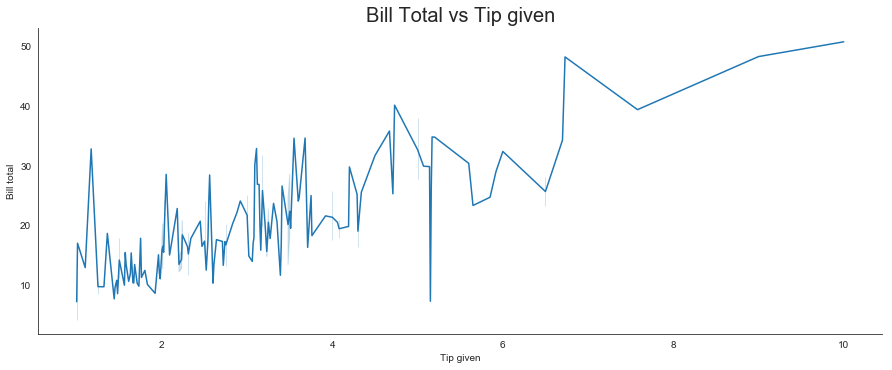

In [26]:

sns.relplot(x="tip", y="total_bill", kind="line", data=df, height=5, aspect=2.5 )
ax = plt.gca()
ax.set_xlabel('Tip given') # set x_label
ax.set_ylabel('Bill total') # set y_label
ax.set_title('Bill Total vs Tip given', fontsize=20)
plt.show()

### 9. FacetGrid

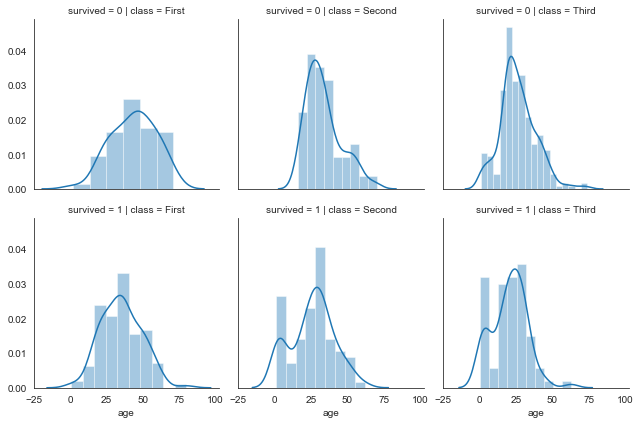

In [27]:
# To break down a plot by some categories, we can use FacetGrid.

g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
plt.show()

### 10.Heatmap

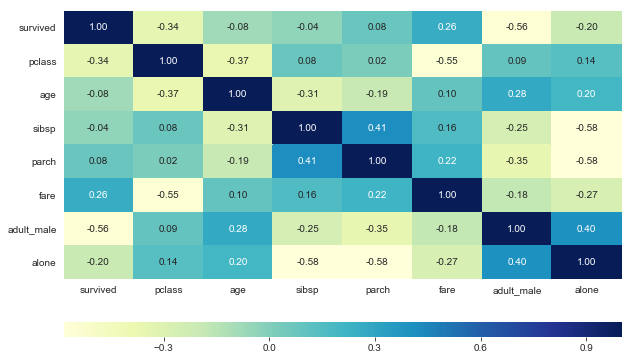

In [28]:
# Heatmaps are ideal to plot “rectangular data” such as matrixes. 
# They’re great to visualize when some values, or calculated values, such as averages, counts, etc. are more extreme.
# We can put into a heatmap is a correlation matrix.
grid_kws = {"height_ratios": (.9, .05), "hspace": .3} # parameters for gridspec
# gridspec_kw is a constructor used to create the grid the subplots are placed on.
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws) 

sns.heatmap(titanic.corr(), annot=True, fmt=".2f", cmap="YlGnBu", ax=ax, cbar_ax=cbar_ax, 
            cbar_kws={"orientation": "horizontal"})
plt.show()

### 11. Pairplot

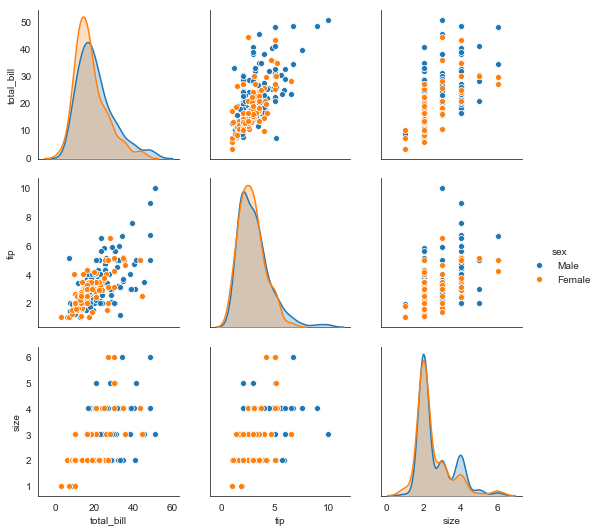

In [29]:
# Pairplots are used for Visualizing the multidimensional relationships among the samples.
sns.pairplot(df, hue='sex', height=2.5);

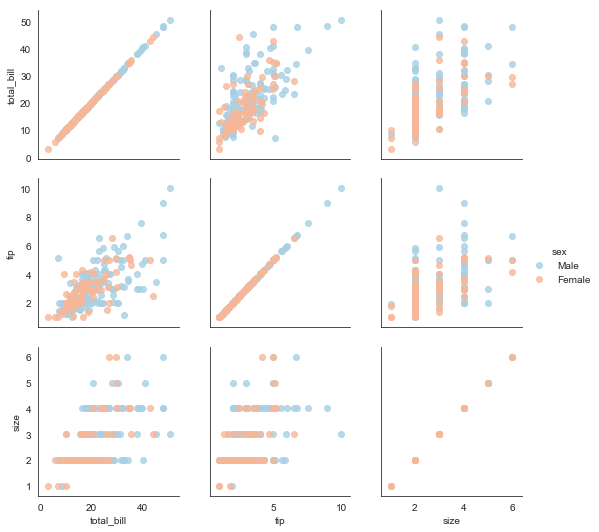

In [30]:
# pairgrid is used to draw correlations.
g = sns.PairGrid(df, hue='sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### 12. Barplots

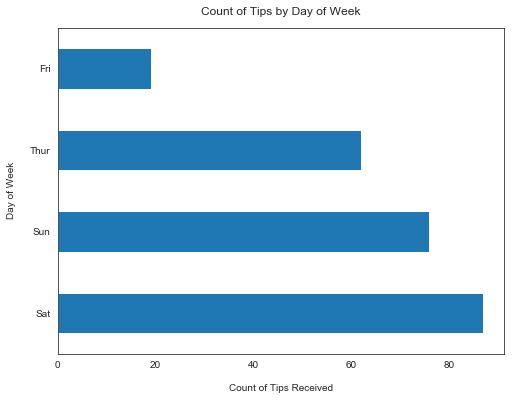

In [31]:
# Horizontal barplot
df['day'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("Count of Tips by Day of Week", y=1.02);

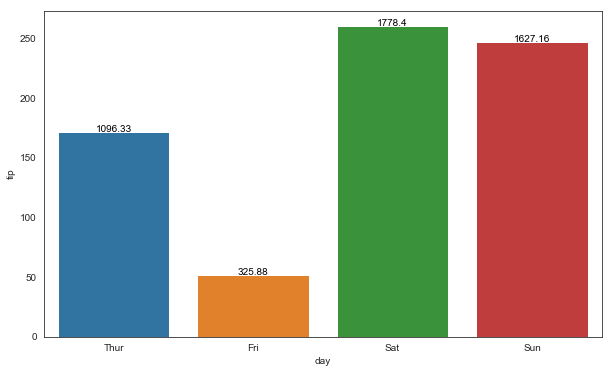

In [32]:
# barplots with text
groupedvalues=df.groupby('day').sum().reset_index()
g=sns.barplot(x='day',y='tip',data=groupedvalues)
# to write text on barplots
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

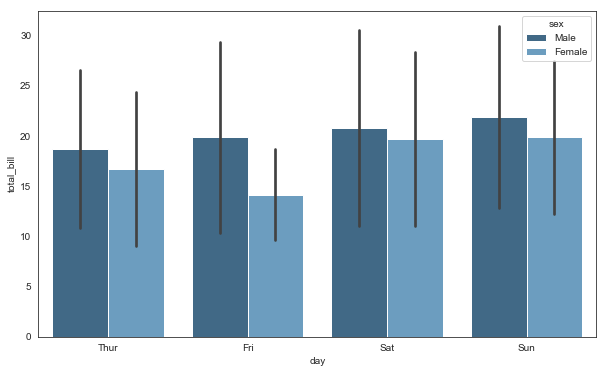

In [33]:
# Grouped barplot
#confidence interval is used as standard deviation.
g = sns.barplot(x="day", y="total_bill", hue="sex", data=df, palette="Blues_d", ci='sd');

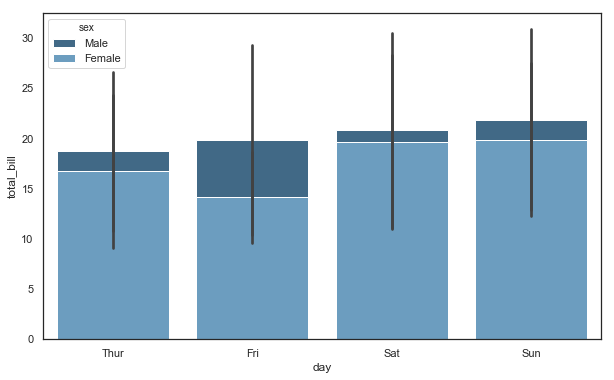

In [34]:
# stacked barplot using seaborn
sns.set(style='white')
g = sns.barplot(x="day", y="total_bill", hue="sex", data=df, palette="Blues_d", ci='sd', dodge=False);

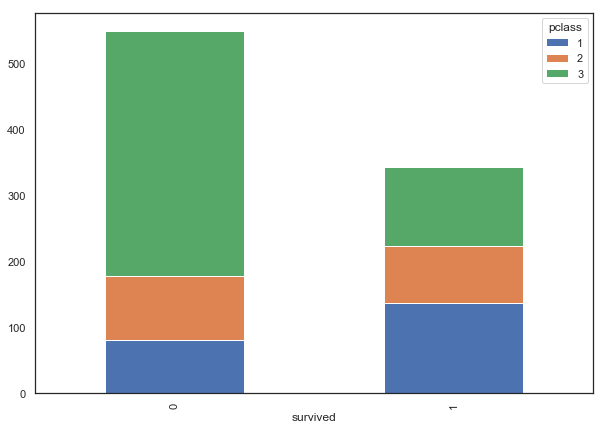

In [35]:
# stacked barplot using matplotlib
df_titanic = pd.crosstab(titanic['survived'],titanic['pclass'])
df_titanic.loc[:,[1,2,3]].plot.bar(stacked=True, figsize=(10,7))
plt.show()

### 13. Tree Map

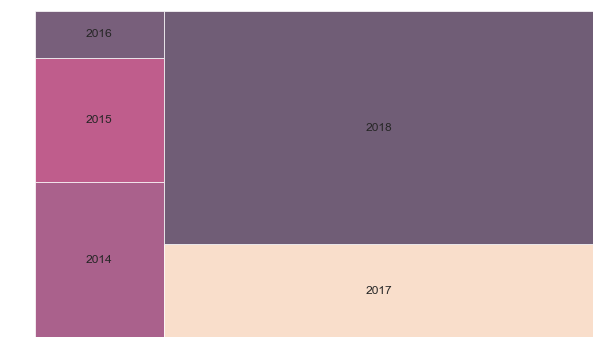

In [36]:
# Treemap
import squarify

population=[1000000,800000,300000,2000000,5000000]
year=['2014','2015','2016','2017','2018']
 
squarify.plot(sizes=population, label=year, alpha=.7 )
plt.axis('off')
plt.show()


### 14.Mosaic plot

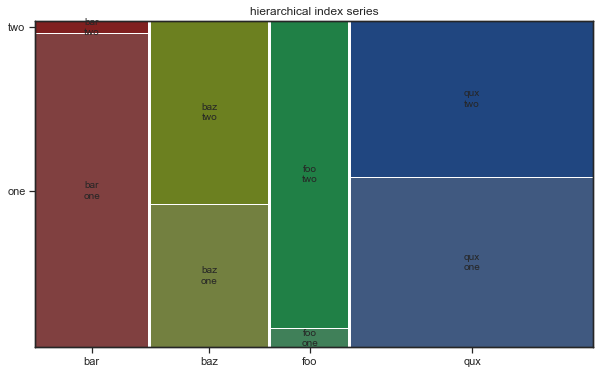

In [37]:
# mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

rand = np.random.random
from itertools import product
tuples = list(product(['bar', 'baz', 'foo', 'qux'], ['one', 'two']))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
data = pd.Series(rand(8), index=index)
mosaic(data, title='hierarchical index series')
plt.show()